In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Import Data

In [2]:
data =pd.read_csv('/Users/liuwang/Desktop/xAPI-Edu-Data (processed).csv')

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 27 columns):
gender                            480 non-null object
gender (1,0)                      480 non-null int64
NationalITy                       480 non-null object
PlaceofBirth                      480 non-null object
Stage(1,2.3)                      480 non-null int64
StageID                           480 non-null object
GradeID                           480 non-null object
SectionID                         480 non-null object
Section(1,2,3)                    480 non-null int64
Topic                             480 non-null object
Topic (1,0)                       480 non-null int64
Semester                          480 non-null object
Semster (1,0)                     480 non-null int64
Relation                          480 non-null object
Relation(1,0)                     480 non-null int64
raisedhands                       480 non-null int64
VisITedResources                  480 

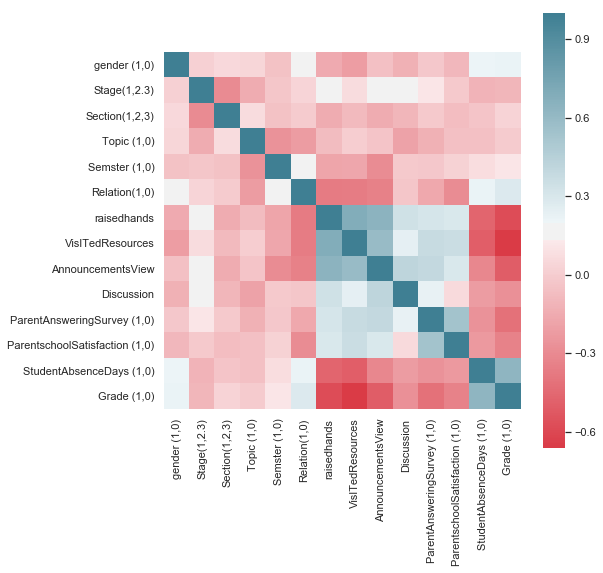

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(10, 220, as_cmap=True),
            square=True)

In [5]:
data.drop(['gender','gender (1,0)','NationalITy','PlaceofBirth','StageID',
          'GradeID','SectionID','Topic','Semester','Relation'
        ,'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class',
           'ParentAnsweringSurvey (1,0)','ParentschoolSatisfaction (1,0)','Semster (1,0)',
           'Relation(1,0)','Stage(1,2.3)','Section(1,2,3)','Topic (1,0)','Discussion'
          ],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
StudentAbsenceDays (1,0)    480 non-null int64
Grade (1,0)                 480 non-null int64
dtypes: int64(5)
memory usage: 18.8 KB


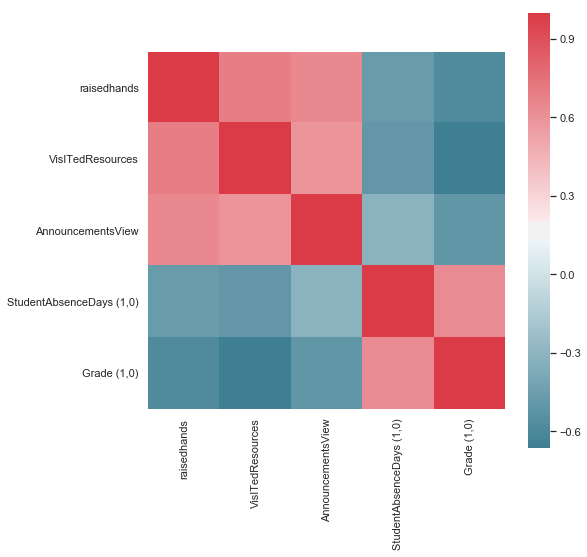

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [8]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,raisedhands,VisITedResources,AnnouncementsView,"StudentAbsenceDays (1,0)","Grade (1,0)"
raisedhands,1,0.69,0.64,-0.46,-0.58
VisITedResources,0.69,1,0.59,-0.5,-0.66
AnnouncementsView,0.64,0.59,1,-0.31,-0.5
"StudentAbsenceDays (1,0)",-0.46,-0.5,-0.31,1,0.63
"Grade (1,0)",-0.58,-0.66,-0.5,0.63,1



# Train Dataset 

In [9]:
X= data.drop('Grade (1,0)',axis =1)
y= data['Grade (1,0)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
predictions = logmodel.predict(X_test)

In [11]:
from sklearn.metrics import classification_report

classification_report(y_test,predictions)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9166666666666666

In [12]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)

result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.224421
         Iterations 8
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.621     
Dependent Variable:    Grade (1,0)        AIC:                158.8112  
Date:                  2019-06-23 18:03   BIC:                174.0796  
No. Observations:      336                Log-Likelihood:     -75.406   
Df Model:              3                  LL-Null:            -199.16   
Df Residuals:          332                LLR p-value:        2.2701e-53
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
raisedhands              -0.0228   0.0109 -2.0991 0

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[103   8]
 [  4  29]]
